In [164]:
#!pip install faker
#!pip uninstall elasticsearch --yes
#!pip uninstall certifi --yes
#!pip install ujson
#!pip install -U elasticsearch
#!pip install -U certifi
#!pip install pandasticsearch[pandas]
#!pip install elasticsearch_dsl

from IPython.display import HTML

HTML('''

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
    $('.header').hide();
  });
</script>


''')



In [29]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import requests
from faker import Faker
import ujson as json
import pandas as pd
import requests
from numpy import random 
from elasticsearch import Elasticsearch
from elasticsearch import helpers
from elasticsearch_dsl import Search, DocType, Date, Integer, Keyword, Text
from datetime import datetime
from elasticsearch_dsl.connections import connections
import requests
from random import randint
from pandas.io.json import json_normalize
from pandasticsearch import DataFrame
from pandasticsearch import Select


ES_HOST = 'http://ec2-34-205-15-150.compute-1.amazonaws.com:9200'
INDEX = "eda_xxsmall"

es = Elasticsearch(ES_HOST)
es.indices.put_settings(index=INDEX,
                        body= {"index" : {
                                "max_result_window" : 750000
                              }})
DOC_TYPE="user"

In [32]:
## Create Elasticsearch Query
query0 = {
            "from" : 0, 
            "size" : 5000,
            "query": {
                        "match_all": {}
                     }
            }

In [33]:
## Import Data
result_dict = es.search(index=INDEX, body=query0)

{'_index': 'eda_xxsmall', '_type': 'user', '_source': {'email_unsubscribe': False, 'signup_date': '2016-04-29T01:57:59', 'r_score': 5, 'name': 'Henry Patterson', 'revenue': 4864, 'f_score': 1, 'days_since_last_purchase': 48, 'm_score': 4, 'discount_percentage': 9, 'City': 'Hyderabad', 'total_discount_revenue': 437.76, 'segments': [], 'Avg Order Value': 2432.0, 'num_of_orders': 2, 'rfm_score': 10, 'lifecycle': 'Repeat_Sleeping'}, '_score': 1.0, '_id': 'cca4e857-4fa2-42da-818f-b5df989306b2'}


In [19]:

df = Select.from_dict(result_dict).to_pandas()
df = df.set_index(['_id'])
df.drop(['_index', '_score', '_type'],inplace=True,axis=1,errors='ignore')
df.head()


,Avg Order Value,City,days_since_last_purchase,discount_percentage,email_unsubscribe,f_score,lifecycle,m_score,name,num_of_orders,r_score,revenue,rfm_score,segments,signup_date,total_discount_revenue
_id,,,,,,,,,,,,,,,,
cca4e857-4fa2-42da-818f-b5df989306b2,2432.000000,Hyderabad,48,9,False,1,Repeat_Sleeping,4,Henry Patterson,2,5,4864,10,[],2016-04-29T01:57:59,437.76
1fcdf545-027e-3781-3c4f-b4eec485d49c,3993.500000,Bangalore,95,27,False,1,Repeat_Churned,5,Christina Bennett,2,3,7987,9,"[High_Discount_Seeker, High_Cart_Value]",2015-06-27T03:16:48,2156.49
104b6329-71ca-77b5-4d07-e755bd6bbc9d,1114.750000,Delhi,5,25,False,3,Repeat_Active,4,Joseph Lang MD,4,9,4459,16,[NCR],2015-11-01T06:32:09,1114.75
7308306b-907e-8831-8dd1-4c4335f41abc,2559.333333,Ahmedabad,71,22,False,2,Repeat_Churned,5,Janice Martinez,3,4,7678,11,[],2015-07-28T10:35:23,1689.16
54fd5069-6c5e-eec1-f6df-64bd045afc5f,1643.000000,Thane,84,13,False,4,Loyal_Churned,5,Duane West,6,4,9858,13,[],2015-07-22T13:20:55,1281.54


In [20]:
df.describe()

,Avg Order Value,days_since_last_purchase,discount_percentage,f_score,m_score,num_of_orders,r_score,revenue,rfm_score,total_discount_revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,1573.498182,50.805600,16.794000,2.040600,3.886400,5.906000,5.409600,8965.557200,11.33660,1505.509572
std,1253.966806,28.653789,7.149167,2.201254,2.540785,10.278808,1.772585,10774.588645,4.85436,2073.220700
min,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.00000,0.000000
25%,510.000000,26.000000,11.000000,0.000000,1.000000,1.000000,4.000000,668.000000,7.00000,108.277500
50%,1313.200000,50.000000,17.000000,1.000000,4.000000,2.000000,5.000000,3538.000000,11.00000,579.330000
75%,2542.200000,76.000000,23.000000,4.000000,6.000000,7.000000,7.000000,14271.250000,15.00000,2090.550000
max,4908.666667,99.000000,29.000000,9.000000,8.000000,122.000000,9.000000,39999.000000,26.00000,11561.720000


## 1.1 Histograms
- A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of **continuous data**. 
- This allows the inspection of the data for its underlying distribution (e.g., normal distribution),width of spread, median data value, outliers, skewness, etc. 

### Skeweness

<img src="http://researchhubs.com/uploads/skewness.png">


### Modality
<img src="http://researchhubs.com/uploads/modality.png">

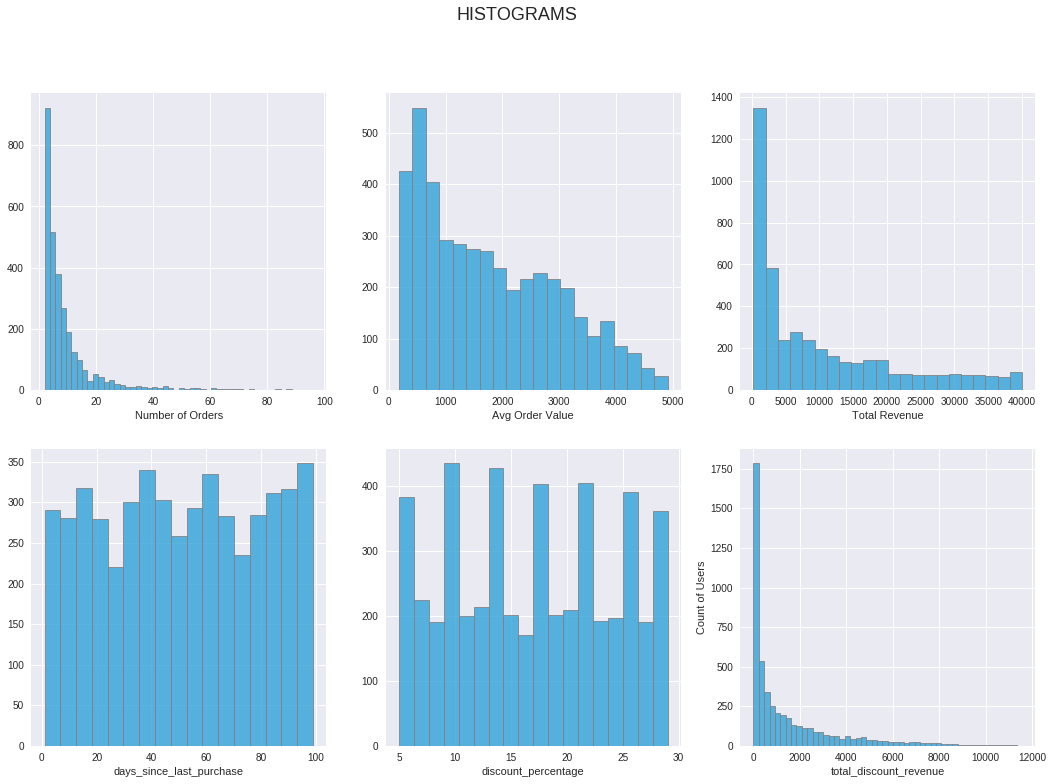

In [21]:
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
 
sns.set_palette(five_thirty_eight)
fig, axes = plt.subplots(2,3, figsize=(18,12))

sns.distplot(df.num_of_orders[(df.num_of_orders>1) & (df.num_of_orders<100)],  kde=False, 
             ax = axes[0,0], hist_kws={"linewidth": 1, "alpha": 0.8, "edgecolor":"grey"})
#axes[0].set_title("Total Order Distribution")
axes[0,0].set(xlabel='Number of Orders')


sns.distplot(df['Avg Order Value'][df['Avg Order Value']>0] ,kde=False, 
             ax = axes[0,1],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[0,1].set(xlabel="Avg Order Value")
#axes[1].set_title("\nAvg Order Value Distribution")


sns.distplot(df.revenue[df.revenue>0] , kde=False, 
             ax = axes[0,2],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[0,2].set(xlabel="Total Revenue")
#axes[2].set_title("Total Revenue Distribution")


sns.distplot(df.days_since_last_purchase,  kde=False, 
             ax = axes[1,0], hist_kws={"linewidth": 1, "alpha": 0.8, "edgecolor":"grey"})
#axes[0].set_title("Total Order Distribution")
axes[1,0].set(xlabel='days_since_last_purchase' )


sns.distplot(df['discount_percentage'] ,kde=False, 
             ax = axes[1,1],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[1,1].set(xlabel="discount_percentage" )
#axes[1].set_title("\nAvg Order Value Distribution")


sns.distplot(df.total_discount_revenue , kde=False, 
             ax = axes[1,2],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[1,2].set( ylabel='Count of Users')
#axes[2].set_title("Total Revenue Distribution")



sns.plt.suptitle('HISTOGRAMS',fontsize=18)
plt.show()

### What is Data Transformations
Data Transformations are useful tricks for making certain types of data easier to model.

A transformation is a rescaling of the data using a function. When data are very stongly skewed, sometimes we transform them so they are easier to model.

### (Natural) log transformation
The most commonly used transformation is the natural log transformation. Natural log transformation is often applied when:

Much of the data cluster near zero (relative to larger values in the data set).
and, all observations are positive.


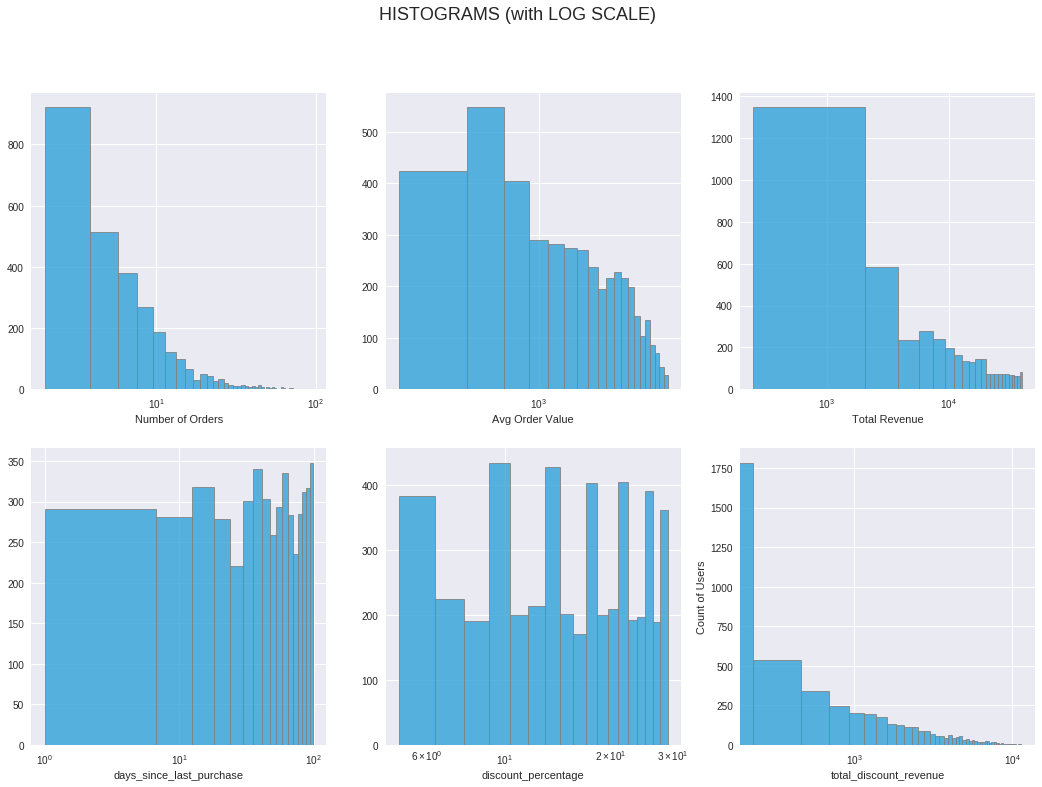

In [22]:
sns.set_palette(five_thirty_eight)
fig, axes = plt.subplots(2,3, figsize=(18,12))

sns.distplot(df.num_of_orders[(df.num_of_orders>1) & (df.num_of_orders<100)],  kde=False, 
             ax = axes[0,0], hist_kws={"linewidth": 1, "alpha": 0.8, "edgecolor":"grey"})
#axes[0].set_title("Total Order Distribution")
axes[0,0].set(xlabel='Number of Orders', xscale='log')


sns.distplot(df['Avg Order Value'][df['Avg Order Value']>0] ,kde=False, 
             ax = axes[0,1],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[0,1].set(xlabel="Avg Order Value", xscale='log')
#axes[1].set_title("\nAvg Order Value Distribution")


sns.distplot(df.revenue[df.revenue>0] , kde=False, 
             ax = axes[0,2],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[0,2].set(xlabel="Total Revenue", xscale='log')
#axes[2].set_title("Total Revenue Distribution")


sns.distplot(df.days_since_last_purchase,  kde=False, 
             ax = axes[1,0], hist_kws={"linewidth": 1, "alpha": 0.8, "edgecolor":"grey"})
#axes[0].set_title("Total Order Distribution")
axes[1,0].set(xlabel='days_since_last_purchase' , xscale='log')


sns.distplot(df['discount_percentage'] ,kde=False, 
             ax = axes[1,1],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[1,1].set(xlabel="discount_percentage" , xscale='log')
#axes[1].set_title("\nAvg Order Value Distribution")


sns.distplot(df.total_discount_revenue , kde=False, 
             ax = axes[1,2],hist_kws={"linewidth": 1,"alpha": 0.8, "edgecolor":"grey"})
axes[1,2].set( ylabel='Count of Users', xscale='log', )
#axes[2].set_title("Total Revenue Distribution")





sns.plt.suptitle('HISTOGRAMS (with LOG SCALE)',fontsize=18)
plt.show()


## 1.2 An empirical CDF (ECDF)
ECDF plot is a graph that you can use to evaluate the fit of a distribution to your data, estimate percentiles, and compare different sample distributions. 
An empirical CDF plot does the following:
- Plots each unique value vs the percentage of values in the sample that are less than or equal to it, and connects the points with a stepped line.
- Fits a cumulative distribution function (CDF) for the selected distribution so that you can examine how well the distribution fits your data.
- Displays a table with the distribution parameter estimates and the number of observations (N) for your data.


In [23]:
df.columns

Index(['Avg Order Value', 'City', 'days_since_last_purchase',
       'discount_percentage', 'email_unsubscribe', 'f_score', 'lifecycle',
       'm_score', 'name', 'num_of_orders', 'r_score', 'revenue', 'rfm_score',
       'segments', 'signup_date', 'total_discount_revenue'],
      dtype='object')

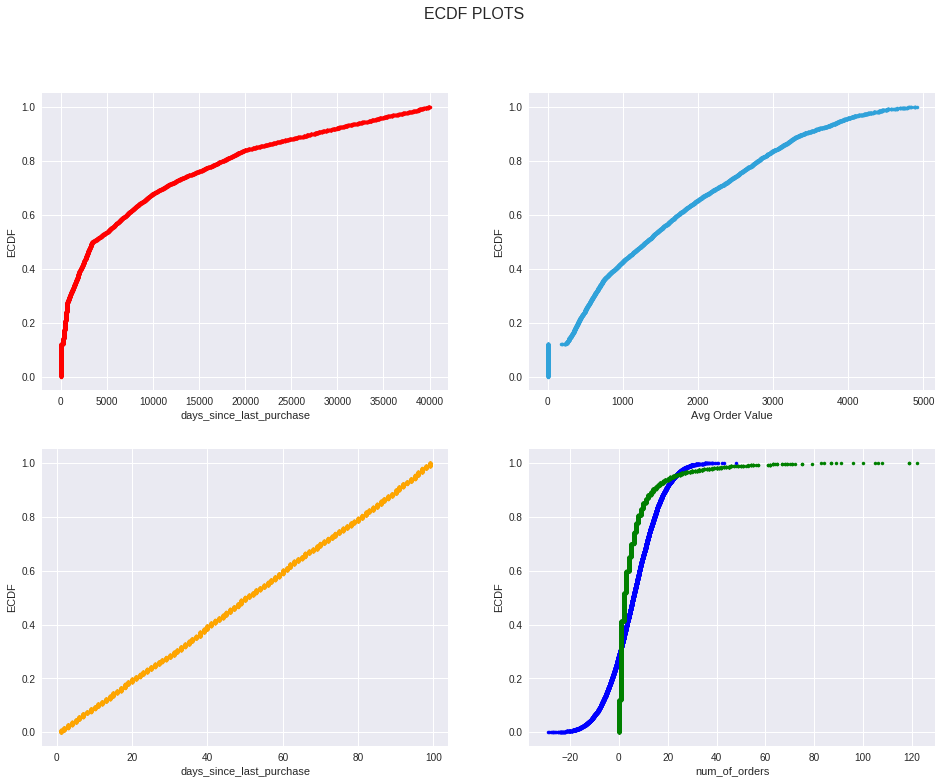

In [28]:
def ecdf(Some_Series):
    x = np.sort(Some_Series)
    y = np.arange(1, len(x)+1)/len(x)
    return x,y 

x,y = ecdf(df.revenue)
f, axarr = plt.subplots(2, 2, figsize=(16,12))

axarr[0, 0].plot(x, y, marker=".", linestyle="none", color="red")
axarr[0, 0].set(xlabel='days_since_last_purchase' , ylabel="ECDF")

x,y = ecdf(df['Avg Order Value'])

axarr[0, 1].plot(x, y, marker=".", linestyle="none")
axarr[0, 1].set(xlabel='Avg Order Value' , ylabel="ECDF")

x = np.sort(df['days_since_last_purchase'])
y = np.arange(1, len(x)+1)/len(x)

axarr[1, 0].plot(x, y, marker=".", linestyle="none", color="orange")
axarr[1, 0].set(xlabel='days_since_last_purchase' , ylabel="ECDF")

x = np.sort(df['num_of_orders'])
y = np.arange(1, len(x)+1)/len(x)

### Let's create a CDF plot of nornmalised data

normal_data_num_of_orders = np.random.normal(np.mean(df['num_of_orders']), np.std(df['num_of_orders']), 10000)
x_theoretical, y_theoretical = ecdf(normal_data_num_of_orders)
axarr[1, 1].plot(x_theoretical, y_theoretical, marker=".", linestyle="none", color="blue")
axarr[1, 1].plot(x, y, marker=".", linestyle="none", color="green")


axarr[1, 1].set(xlabel='num_of_orders' , ylabel="ECDF")

sns.plt.suptitle('ECDF PLOTS',fontsize=16)
plt.show()


In [26]:
x_theoretical = np.mean(df['num_of_orders'])
y_theoretical = np.std(df['num_of_orders'])
print(x_theoretical, y_theoretical)

5.906 10.2777801105


## 1.3 Beeswarm Plot
A Beeswarm plot is a two-dimensional visualisation technique where data points are plotted relative to a fixed reference axis so that no two datapoints overlap.

#### Why it is used?
Imagine that you have a continuous data variable (like Customer Revenue) that you want to compare between two or more different treatment groups (like Lifecycle of Customers). The potential problems with other plots is that you could have very dense grouping of data points, leading to data points being plotted over top of one another on the chart and obscuring the data.

Swarm plot move data points with the minimum distance away from one another to avoid overlays. The result is a plot where you can see each distinct data point,

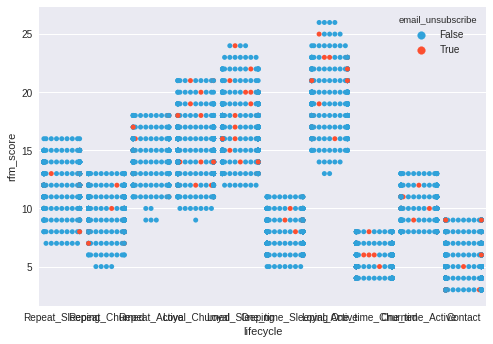

In [15]:
#Generating a swarm plot
sns.swarmplot(x=df.lifecycle, y=df.rfm_score ,hue=df.email_unsubscribe)
#_ = plt.title("SWARM PLOT \n\nRevenue distribution with Lifecycle", fontsize=16)
#_ = plt.xlabel("Lifecyle")
#_ = plt.ylabel("Avg. Revenue per month ")
#_ = plt.legend(title= 'Email Subscribed', bbox_to_anchor=(1,1),ncol=1)
# bbox is bounding box with lower left corner at position 
#plt.show()

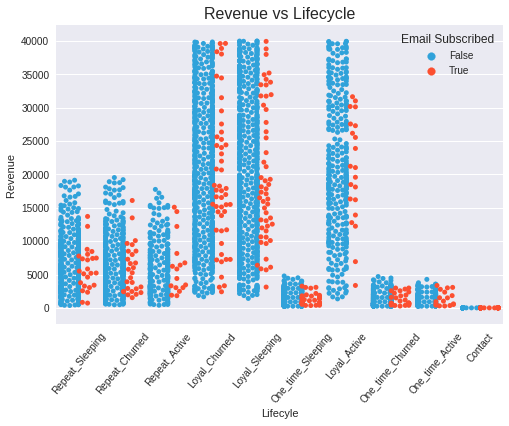

In [16]:
## Generating a swarm plot
g = sns.swarmplot(x=df.lifecycle, y=df.revenue, hue = df.email_unsubscribe, split=True)
_ = plt.title("Revenue vs Lifecycle", fontsize=16)
_ = plt.xlabel("Lifecyle")
_ = plt.ylabel("Revenue ")
_ = plt.xticks(rotation=50) 
_ = plt.legend(title= 'Email Subscribed', bbox_to_anchor=(1,1),ncol=1)
# bbox is bounding box with lower left corner at position 
plt.show()

TypeError: unorderable types: str() > int()

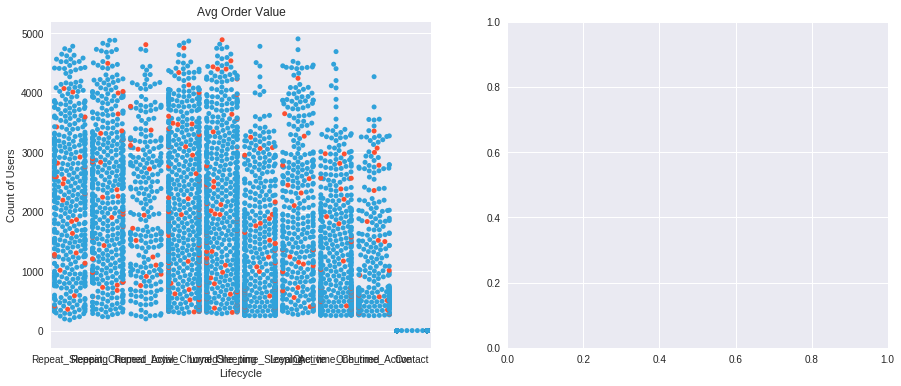

In [107]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.swarmplot(x=df.lifecycle, y=df['Avg Order Value'] ,ax = axes[0], hue=df.email_unsubscribe)
axes[0].set_title("Avg Order Value")
axes[0].set(xlabel='Lifecycle', ylabel='Count of Users')
axes[0].legend_.remove()

sns.swarmplot(x=df.lifecycle, y=df.revenue['revenue'>20000] ,ax = axes[1], hue=df.email_unsubscribe)
axes[1].set_title("Revenue Distribution")
axes[1].set(xlabel='Lifecycle', ylabel='Count of Users')
axes[1].legend_.remove()

sns.plt.suptitle('SWARM PLOT ',fontsize=18)
_ = plt.legend(title= 'Email Subscribed', bbox_to_anchor=(1,1),ncol=1)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=75)

plt.show()

### Interpretation from above Swarmplots
- Which lifecyle has more total revenue 
- Which lifecycle has lower avg. revenue per month

## 1. 4 Box and Whisker Plots

A box plot is a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum. 

In a typical box plot, the top of the rectangle indicates the third quartile, a horizontal line near the middle of the rectangle indicates the median, and the bottom of the rectangle indicates the first quartile. A vertical line extends from the top of the rectangle to indicate the maximum value, and another vertical line extends from the bottom of the rectangle to indicate the minimum value. 


<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif">

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


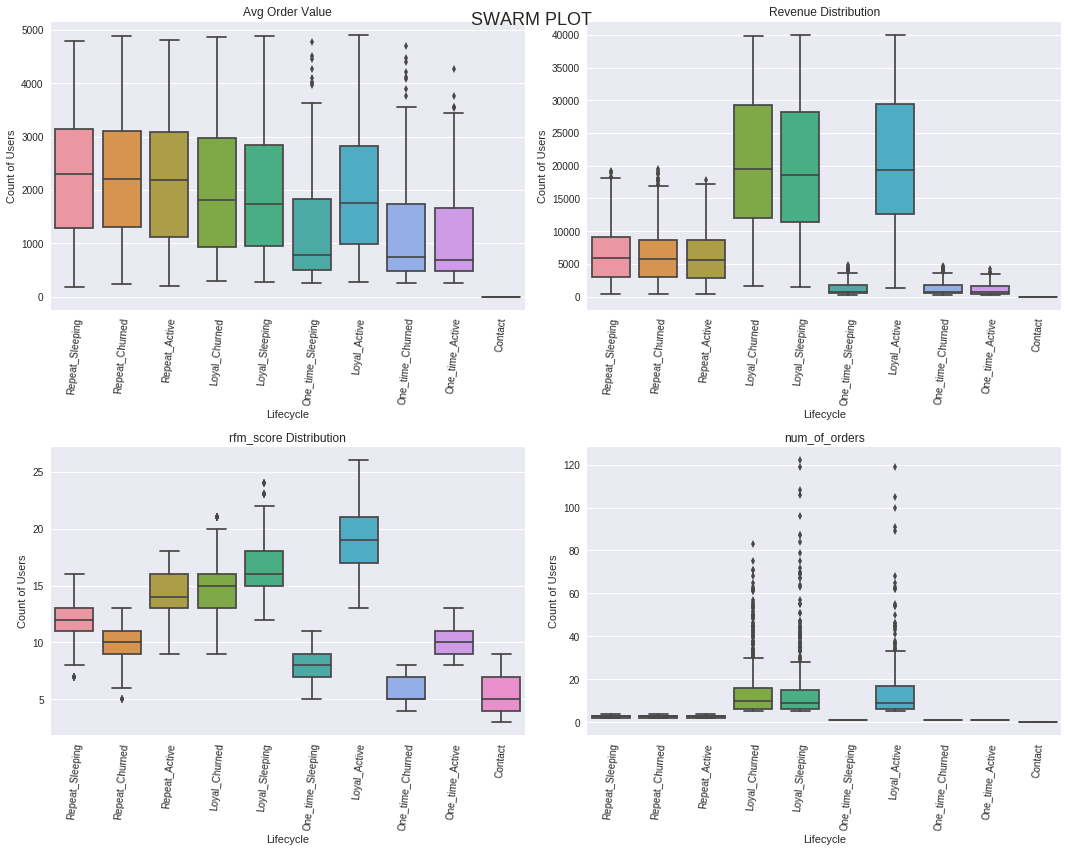

In [104]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x=df.lifecycle, y=df['Avg Order Value'] ,ax = axes[0,0])
axes[0,0].set_title("Avg Order Value")
axes[0,0].set(xlabel='Lifecycle', ylabel='Count of Users')

sns.boxplot(x=df.lifecycle, y=df['revenue'] ,ax = axes[0,1])
axes[0,1].set_title("Revenue Distribution")
axes[0,1].set(xlabel='Lifecycle', ylabel='Count of Users')

sns.boxplot(x=df.lifecycle, y=df['rfm_score'] ,ax = axes[1,0])
axes[1,0].set_title("rfm_score Distribution")
axes[1,0].set(xlabel='Lifecycle', ylabel='Count of Users')

sns.boxplot(x=df.lifecycle, y=df['num_of_orders'] ,ax = axes[1,1])
axes[1,1].set_title("num_of_orders")
axes[1,1].set(xlabel='Lifecycle', ylabel='Count of Users')

sns.plt.suptitle('SWARM PLOT ',fontsize=18)
sns.plt.legend(title= 'Email Subscribed', bbox_to_anchor=(1,1),ncol=1)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=85)

# bbox is bounding box with lower left corner at position 
plt.tight_layout()
plt.show()



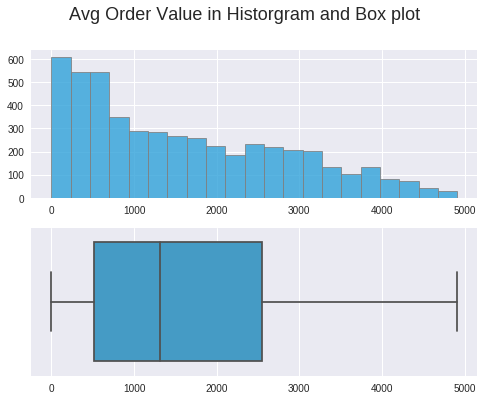

In [186]:
fig, axes = plt.subplots(2,1, figsize=(8,6))

sns.boxplot(df['Avg Order Value'] ,ax = axes[1])
sns.distplot(df['Avg Order Value'],  kde=False, 
             ax = axes[0], hist_kws={"linewidth": 1, "alpha": 0.8, "edgecolor":"grey"})
axes[0].set(xlabel='')
axes[1].set(xlabel='')


sns.plt.suptitle('Avg Order Value in Historgram and Box plot ',fontsize=18)
plt.show()

# 1.5 ECDF for Binomial Distribution
First find probability of binomial variable. In our case, binomial variable is email_unsubscribe

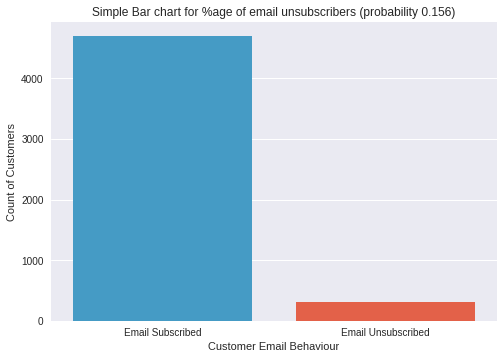

In [315]:
df.email_unsubscribe[df['email_unsubscribe'] == False].count()
df.email_unsubscribe[df['email_unsubscribe'] == True].count()

email_subs = [df.email_unsubscribe[df['email_unsubscribe'] == False].count(), df.email_unsubscribe[df['email_unsubscribe'] == True].count()]
email_subs_p = df.email_unsubscribe[df['email_unsubscribe'] == False].count() / df.email_unsubscribe[df['email_unsubscribe'] == True].count()
email_subs_p = round(email_subs_p/100, 3)
sns.barplot(x=['Email Subscribed', 'Email Unsubscribed'], y=email_subs)
_ = plt.xlabel("Customer Email Behaviour")
_ = plt.ylabel("Count of Customers")

titlestr = "Simple Bar chart for %age of email unsubscribers (probability "  + str(email_subs_p) + ")"
_ = plt.title(titlestr)
plt.show()

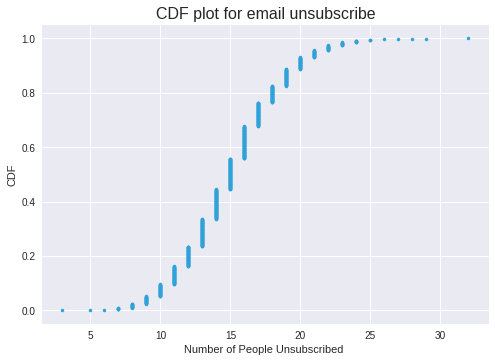

In [312]:
##################################
##
## CDF plot for people unsubscribing 
##
#################################
array_of_emails = np.random.binomial(100,0.15, 1000 )
x, y  = ecdf(array_of_emails)
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.xlabel("Number of People Unsubscribed ")
_ = plt.ylabel("CDF")
_ = plt.title("CDF plot for email unsubscribe", fontsize=16)
plt.show()

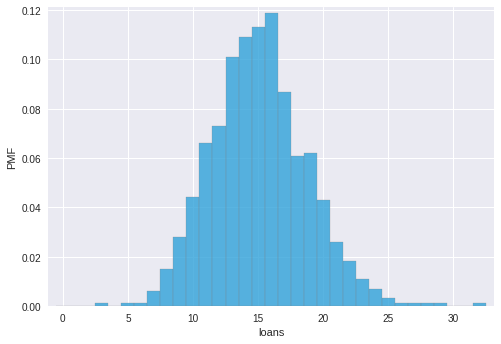

In [313]:
##################################
##
## PMF plot for people unsubscribing 
## Binomial Distribution
##
#################################
# Compute bin edges: bins
bins = np.arange(0, max(array_of_emails) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(array_of_emails, bins=bins, normed=True, alpha=0.8, edgecolor="grey")

# Set margins
_ = plt.margins(0.02)

# Label axes
_ = plt.xlabel("loans")
_ = plt.ylabel("PMF")


# Show the plot
plt.show()


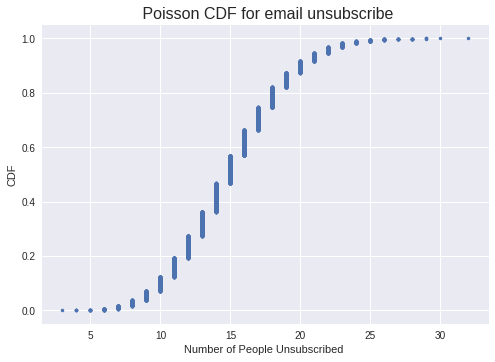

In [14]:
##################################
##
## PMF plot for people unsubscribing 
## Poisson Distribution
##
#################################
# Compute bin edges: bins
array_of_emails_poisson = np.random.poisson(15, 10000 )
#15 customers unsubscribe per 1000 emails
# λ = 15, 
x, y  = ecdf(array_of_emails_poisson)
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.xlabel("Number of People Unsubscribed ")
_ = plt.ylabel("CDF")
_ = plt.title(" Poisson CDF for email unsubscribe", fontsize=16)
plt.show()